# PROBLEM STATEMENT

Recommendation Engines are the much needed manifestations of the desired Predictability of User Activity.Recommendation Engines move one step
further and not only give information but put forth strategies to further increase users interaction with the platform.

In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices.

For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground-up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162732 sha256=4b06d4444d31e8f47c770295ff7aa8f8ee40e43bdf08a2ef2796f05902a30684
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**EXPLORATORY DATA ANALYSIS**

In [2]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

In [3]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(27278, 3)

In [5]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
ratings.shape

(1048575, 4)

In [7]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
#MERGING BOTH THE TABLES
movies = pd.merge(ratings, movies, on='movieId')

In [9]:
movies.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
movies.shape

(1048575, 6)

In [11]:
movies.tail(5)

,userId,movieId,rating,timestamp,title,genres
1048570,7066,88572,1.5,1417484236,Fred: The Movie (2010),Comedy
1048571,7066,112412,4.5,1417664231,Perfect Sisters (2014),Drama|Mystery
1048572,7077,32013,3.5,1170938517,Loop the Loop (Up and Down) (Horem pádem) (2004),Comedy
1048573,7086,102596,4.5,1415652345,180° South (180 Degrees South) (180° South: Co...,Documentary|Drama
1048574,7110,65651,2.0,1234434876,Fire and Ice (2008),Adventure|Fantasy


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
 4   title      1048575 non-null  object 
 5   genres     1048575 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 56.0+ MB


In [13]:
#CHECKING NULL VALUES
movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [14]:
#CHECKING DUPLICATE VALUES
movies.duplicated().sum()

0

In [15]:
movies.iloc[0].genres

'Adventure|Children|Fantasy'

In [16]:
# Split genres column into separate columns
movies['genres'] = movies['genres'].str.split('|')
movies = movies.explode('genres')

In [17]:
movies.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure
0,1,2,3.5,1112486027,Jumanji (1995),Children
0,1,2,3.5,1112486027,Jumanji (1995),Fantasy


The 'genres' column is split into separate columns using '|' as a delimiter, and then the DataFrame is exploded to separate rows for each genre.

In [48]:
movies.tail(5)

,userId,movieId,rating,timestamp,title,genres
1048572,7077,32013,3.5,1170938517,Loop the Loop (Up and Down) (Horem pádem) (2004),Comedy
1048573,7086,102596,4.5,1415652345,180° South (180 Degrees South) (180° South: Co...,Documentary
1048573,7086,102596,4.5,1415652345,180° South (180 Degrees South) (180° South: Co...,Drama
1048574,7110,65651,2.0,1234434876,Fire and Ice (2008),Adventure
1048574,7110,65651,2.0,1234434876,Fire and Ice (2008),Fantasy


In [18]:
# Drop rows with missing values in the 'genres' column
movies = movies.dropna(subset=['genres'])

In [19]:
movies = movies[movies['genres'] != '(no genres listed)']

**Objective 1: Find the list of most popular and liked genres**

In [20]:
average_rating_by_genre = movies.groupby('genres')['rating'].mean().sort_values(ascending=False)
average_rating_by_genre.head(10)

genres
Film-Noir      3.956143
War            3.821342
Documentary    3.758738
Crime          3.683701
Drama          3.678378
Mystery        3.665257
IMAX           3.656697
Animation      3.608344
Western        3.573439
Musical        3.550363
Name: rating, dtype: float64

In [21]:
# Create a dataframe for analysis
trend=pd.DataFrame(movies.groupby('genres')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movies.groupby('genres')['rating'].count())
trend.head()

,rating,total number of ratings
genres,,
Action,3.450897,293934
Adventure,3.507415,230358
Animation,3.608344,59117
Children,3.404140,87101
Comedy,3.432287,395994


The average rating for each genre is calculated and stored in the average_rating_by_genre DataFrame. Additionally, a DataFrame named trend is created to analyze the average rating and total number of ratings for each genre.

In [22]:
movies['genres'].unique()

array(['Adventure', 'Children', 'Fantasy', 'Drama', 'Mystery', 'Sci-Fi',
       'Thriller', 'Crime', 'Action', 'Comedy', 'Romance', 'War',
       'Horror', 'Musical', 'Western', 'Animation', 'IMAX', 'Film-Noir',
       'Documentary'], dtype=object)

In [23]:
movies['genres'].isnull().sum()

0

<ipython-input-24-0278bd3e2348>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=90,fontsize='12',horizontalalignment="right")


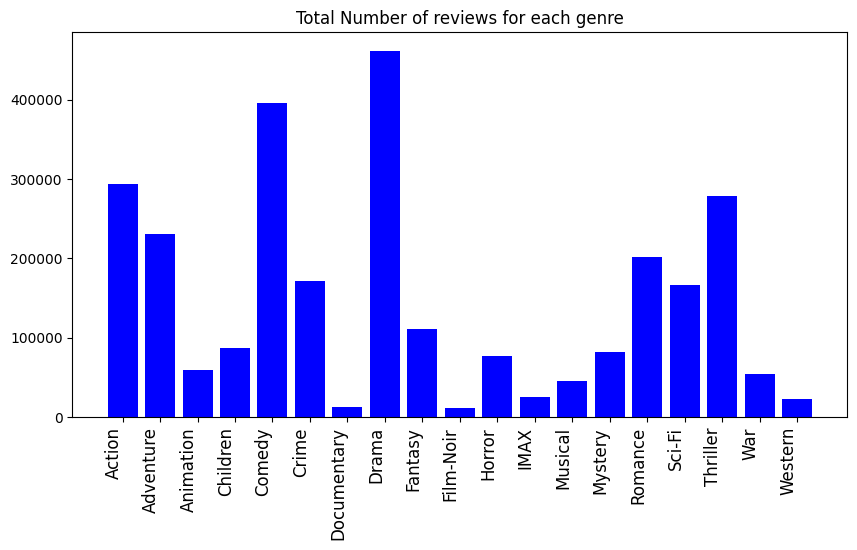

In [24]:
#A bar graph descibibg number of reviews for first 25 genres
plt.figure(figsize =(10, 5))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=90,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each genre")
plt.show()

 A bar graph is plotted to visualize the total number of reviews for the top 25 genres.

<Axes: >

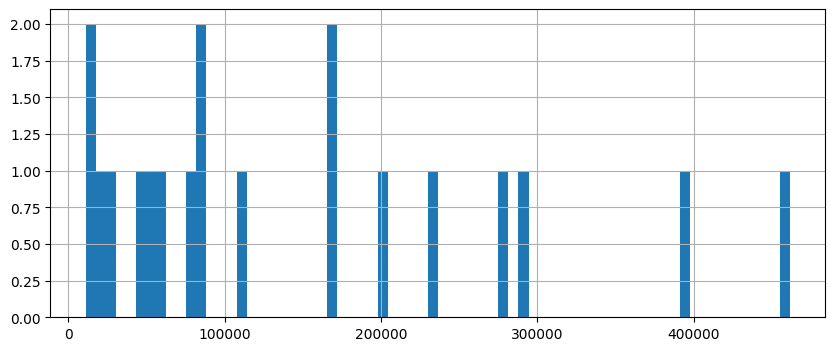

In [25]:
plt.figure(figsize=(10,4))
trend['total number of ratings'].hist(bins=70)

<Axes: >

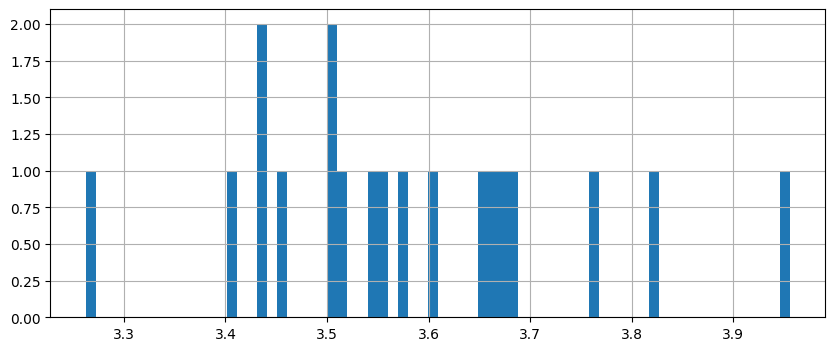

In [26]:
plt.figure(figsize=(10,4))
trend['rating'].hist(bins=70)

**Objective 2 : Create a Recommendation Model that finds the best suited Movie for one user in every genre.**

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

MultiLabelBinarizer is imported from sklearn.preprocessing for encoding genres, and SVD (Singular Value Decomposition) model is imported from surprise library for collaborative filtering-based recommendation.

In [29]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader)

The Dataset is created using the Dataset.load_from_df() method from the surprise library.

In [30]:
svd_model = SVD(n_factors=100, random_state=42)

In [31]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [32]:
svd_model.fit(trainset)

In [49]:
def genre_movie(user_id, genre):
    all_movies = movies[movies['genres']==genre]
    user_unrated_movies = all_movies[~all_movies['movieId'].isin(movies[movies['userId'] == user_id]['movieId'])]
    predictions = [(movie_id, svd_model.predict(user_id, movie_id).est) for movie_id in user_unrated_movies['movieId']]
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    top_recommendation = sorted_predictions[0]
    return movies[movies['movieId'] == top_recommendation[0]]['title'].values[0]

A function named genre_movie() is defined to recommend top-rated movies for a given user and genre based on collaborative filtering.

In [46]:
user_id = 7066
unique_genres = movies['genres'].unique()

For each unique genre, the top-rated movie is recommended for a specific user using the genre_movie() function.

In [47]:
for genre in unique_genres:
    top_genre_movie_title = genre_movie(user_id, genre)
    print(f'Top movie for user {user_id} in {genre} genre: {top_genre_movie_title}')

Top movie for user 7066 in Adventure genre: Fear and Loathing in Las Vegas (1998)
Top movie for user 7066 in Children genre: Holes (2003)
Top movie for user 7066 in Fantasy genre: Pom Poko (a.k.a. Raccoon War, The) (Heisei tanuki gassen pompoko) (1994)
Top movie for user 7066 in Drama genre: Fear and Loathing in Las Vegas (1998)
Top movie for user 7066 in Mystery genre: Diva (1981)
Top movie for user 7066 in Sci-Fi genre: Vanilla Sky (2001)
Top movie for user 7066 in Thriller genre: Diva (1981)
Top movie for user 7066 in Crime genre: Go (1999)
Top movie for user 7066 in Action genre: Diva (1981)
Top movie for user 7066 in Comedy genre: Fear and Loathing in Las Vegas (1998)
Top movie for user 7066 in Romance genre: Modern Times (1936)
Top movie for user 7066 in War genre: Incendies (2010)
Top movie for user 7066 in Horror genre: Wicker Man, The (1973)
Top movie for user 7066 in Musical genre: Scott Pilgrim vs. the World (2010)
Top movie for user 7066 in Western genre: Shane (1953)
Top m

In [51]:
# Evaluate the model
predictions = svd_model.test(testset)

# Calculate RMSE
accuracy = rmse(predictions)

RMSE: 0.5763


 The model performs reasonably well in predicting user ratings for movies in the test set.

**Objective 3 : Find the best and worst-rated genres**

In [28]:
print("Best Ratings by Genre:")
print(average_rating_by_genre.index[0], average_rating_by_genre.values[0])

print("Worst Ratings by Genre:")
print(average_rating_by_genre.index[-1], average_rating_by_genre.values[-1])

Best Ratings by Genre:
Film-Noir 3.9561426919313227
Worst Ratings by Genre:
Horror 3.262442271472432


Film-Noir movies are generally highly rated by users, while Horror movies tend to receive lower ratings. This information can be valuable for understanding user preferences and tailoring recommendations in a movie recommendation system.